In [1]:
# COLAB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 탐색

In [38]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# Mecab 설치
!pip install konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

# 설치 후 런타임 다시 시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/u

In [1]:
# 필요 라이브러리 불러오기
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕 설정
%matplotlib inline
import seaborn as sns

In [2]:
ROOT_DIR  ='/content/drive/MyDrive/my_data/220320_kogpt/'

## Import Data

In [3]:
train = pd.read_csv(ROOT_DIR + "train.csv")
test = pd.read_csv(ROOT_DIR + "test.csv") 

In [4]:
train.tail()

,id,text,summary
40395,REPORT-speech-16815-00004,이것들이 잘할 수 있도록 저희들이 워크숍을 예정하는데 한국고용정보원하고 한국청소년정...,전국기능경기대회는 심각한 코로나 상황으로 인해 방역에 특히 신경을 써서 추진하고자 한다.
40396,REPORT-speech-16815-00005,그래서 10~12월간 제조업체 등을 대상으로 해서 관련된 자율진단을 하고 필요하면 ...,이륜차 사고예방 시범사업은 이동시간 논란이 많은 배달업 종사원들에 대해 안전 배달시...
40397,REPORT-speech-16817-00002,마지막으로 10월 4일에는 슈타인 마이어 독일 연방정부 대통령을 예방합니다. 이 자...,강원도 철원군에서 2021년 통일로가요 결선 경연을 개최하며 결선에 진출한 12개 ...
40398,REPORT-speech-16819-00001,안녕하십니까? 국민권익위원회 대변인 허재우입니다. 9월 넷째 주 정례브리핑입니다. ...,국민권익위는 경기도 소재 21개 중·고등학교를 표본으로 실태조사를 한 결과 저소득층...
40399,REPORT-speech-16820-00001,안녕하십니까? 과기정통부 대변인실 김세준입니다. 9월 27일 월요일 정례브리핑을 시...,"국립중앙과학관은 국민이 직접 만든 영상 콘텐츠, 국민들과 과학관이 함께 만드는 영상..."


- id : 기사를 구분하기 위한 id로 분석 과정에서는 필요 없음
- text : 기사 원문 (x)
- summary : 사람이 작성한 요약문 (y) 

## 데이터 분포 파악

문서의 길이

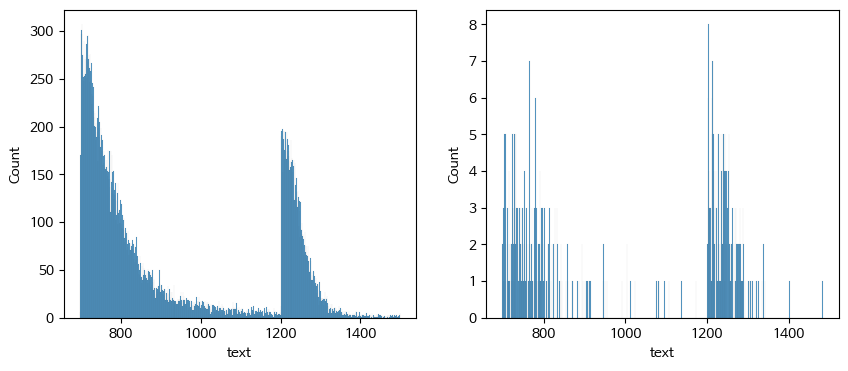

In [5]:
# document length
train_text = train['text'].apply(len)
test_text = test['text'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(train_text, ax=axs[0], binwidth=1)
sns.histplot(test_text, ax=axs[1], binwidth=1)
plt.show()

In [6]:
print('train 문서의 평균 길이:', np.average(train_text))
print('train의 길이 1200 이상 문서 비율:', np.count_nonzero(train_text >= 1200) / len(train_text))
print('-'*50)
print('test 문서의 평균 길이:', np.average(test_text))
print('test의 길이 1200 이상 문서 비율:', np.count_nonzero(test_text >= 1200) / len(test_text))

train 문서의 평균 길이: 921.862599009901
train의 길이 1200 이상 문서 비율: 0.2867326732673267
--------------------------------------------------
test 문서의 평균 길이: 1001.242
test의 길이 1200 이상 문서 비율: 0.474


- train과 test 문서 모두 길이 1200을 전후로 두 종류의 분포를 갖는 것을 확인할 수 있다.
- 단, test 데이터는 두 분포의 비율이 비슷한 데 비해, train 데이터는 문서 길이가 짧은 쪽의 비율이 더 높다

## n-gram 추출

- ROUGE-1 : unigram을 바탕으로 F1-score 계산
- ROUGE-2 : bigram을 바탕으로 F1-scroe 계산

In [7]:
# Mecab을 이용한 형태소 기반 토큰화
from konlpy.tag import Mecab
tokenizer = Mecab()

doc = train['summary']
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))

print(doc[:5])

0    국민 통합 연대 가 연 창립 대회 에 자유 한 국당 홍 전 대표 등 의원 20 여 ...
1    아이엘 사이언스 대표 송 씨 는 발광 다이오드 조명 용 실리콘 렌즈 를 세계 최초 ...
2    SK 텔레콤 은 T 끼리 온 가족 할인 으로 요금 을 깎 아 주 거나 30 년 이상...
3    대형 마트 3 사 가 장바구니 사용 을 독려 하 고 플라스틱 폐기물 을 줄이 기 위...
4    현대차 그룹 은 제네시스 를 이끌 GV 80 의 내 · 외관 사진 을 공개 하 며 ...
Name: summary, dtype: object


In [8]:
# CountVectorizer를 이용한 n-gram 추출

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n(doc, n=1, topn=10):
    # 한국어 단어이므로 lowercase = False
    vectorizer = CountVectorizer(ngram_range=(n, n), lowercase=False)

    vocab = vectorizer.fit_transform(doc)

    # 단어별 빈도수 계산
    freq = vocab.sum(axis=0)

    # 빈도수를 바탕으로 정렬
    sorted_freq = [(word, freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_freq = sorted(sorted_freq, reverse=True, key=lambda x : x[1])

    # Top-n 반환z
    return sorted_freq[:topn]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

unigram

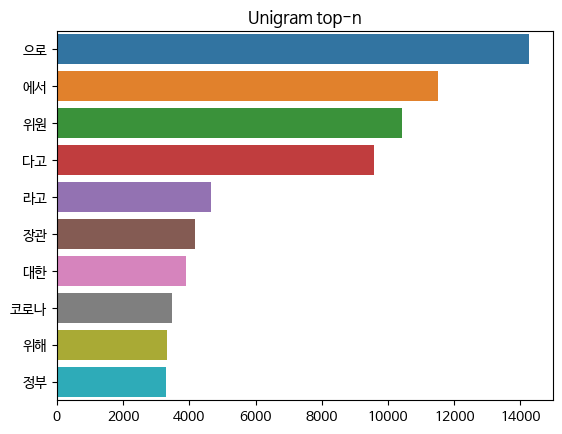

In [15]:
# unigram 시각화

# top_n을 추출하여 단어(y)와 빈도 수(x)를 별도의 리스트로 저장
top_n = get_top_n(doc, 1)
y, x = map(list, zip(*top_n))

sns.barplot(x=x, y=y).set_title('Unigram top-n')
plt.show()

bigram

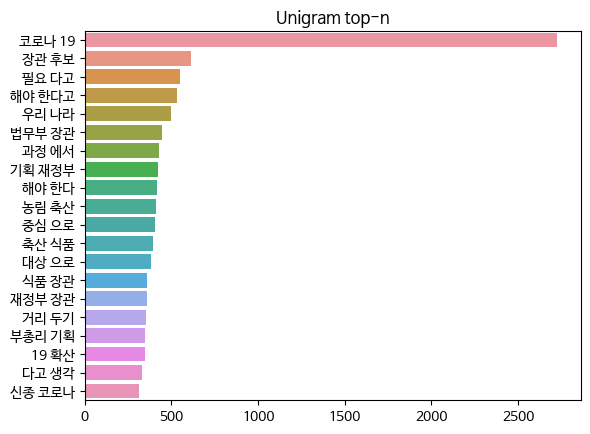

In [16]:
# unigram 시각화

# top_n을 추출하여 단어(y)와 빈도 수(x)를 별도의 리스트로 저장
top_n = get_top_n(doc, 2, 20)
y, x = map(list, zip(*top_n))

sns.barplot(x=x, y=y).set_title('Unigram top-n')
plt.show()

# Train_data 분리

- 문서길이 1200을 기준으로 short와 long 분리


In [ ]:
train.head(2)

,id,text,summary
0,REPORT-news_r-00007-00001,보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오...,국민통합연대가 연 창립대회에 자유한국당 홍 전 대표 등 의원 20여 명을 포함한 5...
1,REPORT-news_r-00018-00001,가난 속에서 맨손으로 혼자 창업해 30대 중반에 코스닥 상장까지 일궈낸 이가 있다....,아이엘사이언스 대표 송 씨는 발광다이오드 조명용 실리콘 렌즈를 세계 최초로 개발하여...


In [ ]:
train_short = train.loc[train['length'] < 1200]
train_long = train.loc[train['length'] >= 1200]

test_short = test.loc[test['length'] < 1200]
test_long = test.loc[test['length'] >= 1200]

In [ ]:
for idx, text in enumerate(train_short['text']):
    if len(text)>968:
        text = text[:968]
    train_short.iloc[idx, 1] = text
train_short['text'].apply(len)

10800    968
10801    740
10802    793
10803    802
10804    839
        ... 
40395    703
40396    869
40397    716
40398    729
40399    731
Name: text, Length: 28816, dtype: int64

In [ ]:
train_short['text'].apply(len).describe()

count    28816.00000
mean       785.64315
std         77.37149
min        697.00000
25%        725.00000
50%        762.00000
75%        822.00000
max        968.00000
Name: text, dtype: float64

In [ ]:
for idx, text in enumerate(train_long['text']):
    if len(text)>1326:
        text = text[:1326]
    train_long.iloc[idx, 1] = text

count    11584.000000
mean      1242.357821
std         33.580868
min       1200.000000
25%       1216.000000
50%       1234.000000
75%       1260.000000
max       1326.000000
Name: text, dtype: float64

In [ ]:
train_short['length'] = train_short['text'].apply(len)
train_long['length'] = train_long['text'].apply(len)

<ipython-input-29-2fd6309ac72f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_short['length'] = train_short['text'].apply(len)
<ipython-input-29-2fd6309ac72f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_long['length'] = train_long['text'].apply(len)


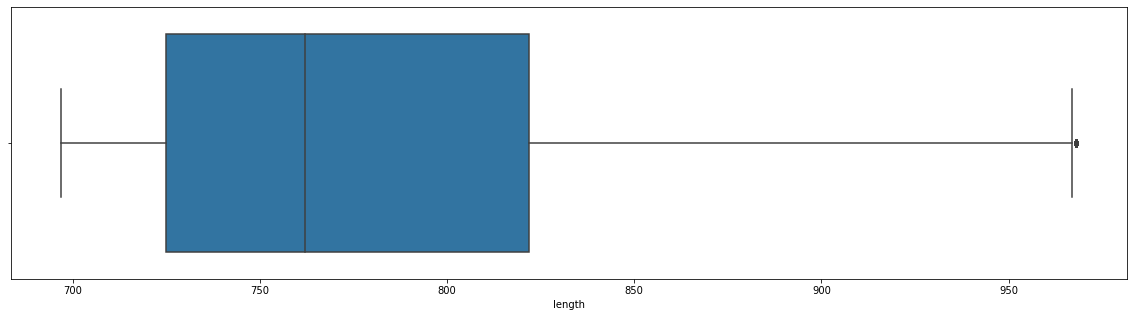

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=train_short['length'])
plt.show()

- 이상치 후보는 약 967.5로, max_length를 968로 설정하자

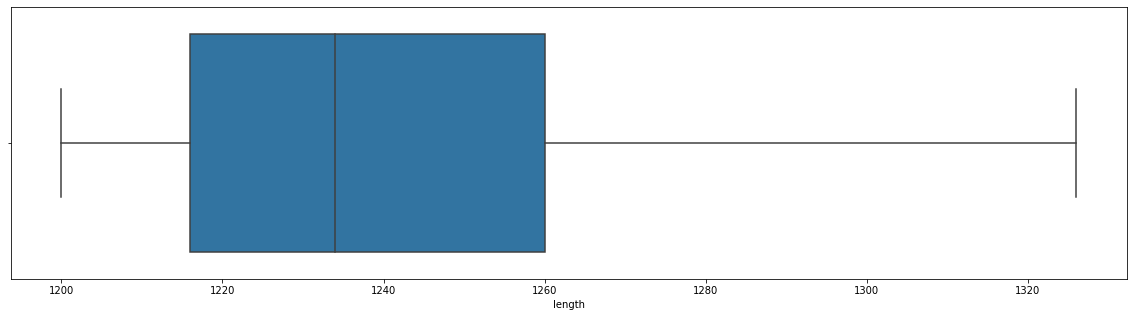

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=train_long['length'])
plt.show()

- 이상치 후보는 1326으로 max_length를 1326으로 설정하자

In [ ]:
# 추후 결합을 위해 인덱스와 함께 to_csv로 저장
train_short.to_csv(ROOT_DIR+'train_short.csv', encoding='utf-8')
train_long.to_csv(ROOT_DIR+'train_long.csv', encoding='utf-8')